In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Set plot style
sns.set_theme(style="whitegrid")

In [4]:
# # ==========================================
# # 0. DATA LOADING & STRATIFIED SAMPLING
# # ==========================================
# print("Loading the cleaned dataset from Sprint 1...")
# df = pd.read_csv('vodafone_age_cleaned_sprint1.csv', dtype={30: str})

# # Stratified sampling (30% of the data)
# # stratify=df['target'] ensures the class distribution remains exactly the same
# df_sample, _ = train_test_split(df, train_size=0.3, stratify=df['target'], random_state=42)

# print(f"\nOriginal dataset shape: {df.shape}")
# print(f"Sampled dataset shape (30%): {df_sample.shape}")

# # Save the sampled dataset for faster iterations in Sprint 2
# sample_filename = 'vodafone_age_sample_30.csv'
# df_sample.to_csv(sample_filename, index=False)
# print(f"Sample saved successfully as '{sample_filename}'")

Loading the cleaned dataset from Sprint 1...

Original dataset shape: (210000, 1288)
Sampled dataset shape (30%): (63000, 1288)
Sample saved successfully as 'vodafone_age_sample_30.csv'


In [7]:
# ==========================================
# 1. LOAD SAMPLED DATA
# ==========================================
print("Loading the 30% sample dataset...")
df_sample = pd.read_csv('vodafone_age_sample_30.csv')

# Separate features (X) and target (y)
X = df_sample.drop(columns=['target'])
y = df_sample['target']

# Select only numeric columns (excluding any remaining object/categorical for MI calculation)
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols]

Loading the 30% sample dataset...


In [8]:
# ==========================================
# 2. FEATURE SELECTION (MUTUAL INFORMATION)
# ==========================================
print(f"Calculating Mutual Information for {len(numeric_cols)} features...")
# We use the sample to calculate MI. It measures dependency between variables.
mi_scores = mutual_info_classif(X_numeric, y, random_state=42)

# Create a DataFrame for easy sorting and selection
mi_df = pd.DataFrame({'Feature': numeric_cols, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

Calculating Mutual Information for 1274 features...



--- Top 10 Selected Features ---
                  Feature  MI_Score
25               lifetime  0.095417
53       instagram_volume  0.094526
54         intagram_count  0.093004
9    DATA_VOLUME_WEEKDAYS  0.085522
10   DATA_VOLUME_WEEKENDS  0.078111
0   CALCULATION_METHOD_ID  0.072198
52               fb_count  0.071890
51              fb_volume  0.068587
57         youtube_volume  0.064017
59          google_volume  0.062973

--- Features at the bottom of Top 200 (Cut-off point) ---
         Feature  MI_Score
38      MONOBANK  0.005924
1167    YCLIENTS  0.005914
931   PrivatBank  0.005880
736   KabanchikU  0.005867
807    MORE PIVA  0.005853
315        10787  0.005840
350         4028  0.005809
981         SUBJ  0.005804
584   DomTelecom  0.005755
927      Poehali  0.005748


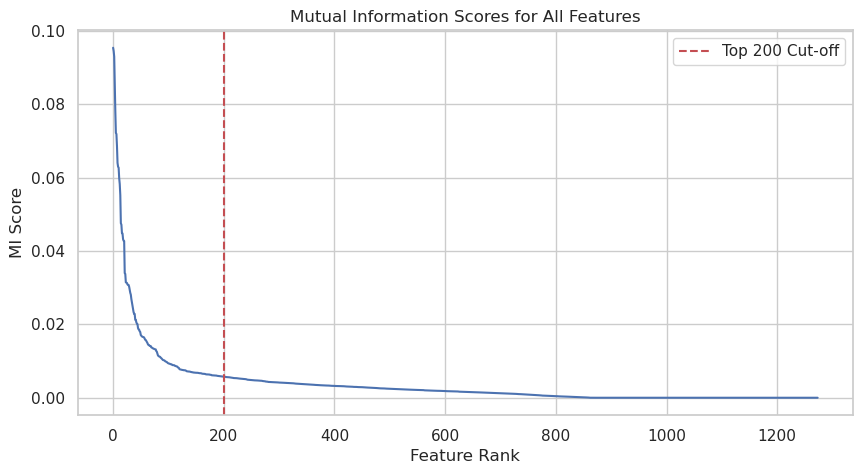

In [9]:
# ==========================================
# 3. SELECT TOP 200 FEATURES
# ==========================================
TOP_K = 200
top_features = mi_df.head(TOP_K)['Feature'].tolist()

print(f"\n--- Top 10 Selected Features ---")
print(mi_df.head(10))

print(f"\n--- Features at the bottom of Top 200 (Cut-off point) ---")
print(mi_df.iloc[190:200])

# Plot the distribution of MI scores to see the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(range(len(mi_df)), mi_df['MI_Score'])
plt.axvline(x=TOP_K, color='r', linestyle='--', label=f'Top {TOP_K} Cut-off')
plt.title('Mutual Information Scores for All Features')
plt.xlabel('Feature Rank')
plt.ylabel('MI Score')
plt.legend()
plt.show()

In [10]:
# ==========================================
# 4. CREATE & SAVE BASELINE DATASET
# ==========================================
# Keep target and the selected top 200 features
cols_to_keep = ['target'] + top_features
df_baseline = df_sample[cols_to_keep]

# Save the reduced dataset for baseline modeling
output_filename = 'vodafone_age_top200_sprint2.csv'
df_baseline.to_csv(output_filename, index=False)
print(f"\nSuccess! Reduced dataset saved as '{output_filename}'. Shape: {df_baseline.shape}")


Success! Reduced dataset saved as 'vodafone_age_top200_sprint2.csv'. Shape: (63000, 201)
